In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../")
from src.preprocess import clean_data, encode_features, select_features
from src.model import train_and_save_model
from src.model_improve import train_and_save_model_improve

In [2]:
df = pd.read_csv(r"F:\BTL_CODE\BTL_BIGDATA\data\Data_salary.csv")

In [3]:
desc = df.describe()
median = df.median(numeric_only=True)
desc.loc['median'] = median
mode = df.mode(numeric_only=True).iloc[0]
desc.loc['mode'] = mode
print(desc)

           work_year        salary  salary_in_usd  remote_ratio
count   16534.000000  1.653400e+04   16534.000000  16534.000000
mean     2023.226866  1.637270e+05  149686.777973     32.003750
std         0.713558  3.402057e+05   68505.293156     46.245158
min      2020.000000  1.400000e+04   15000.000000      0.000000
25%      2023.000000  1.017630e+05  101125.000000      0.000000
50%      2023.000000  1.422000e+05  141300.000000      0.000000
75%      2024.000000  1.872000e+05  185900.000000    100.000000
max      2024.000000  3.040000e+07  800000.000000    100.000000
median   2023.000000  1.422000e+05  141300.000000      0.000000
mode     2023.000000  1.500000e+05  150000.000000      0.000000


In [4]:
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
6,2024,MI,FT,ML Engineer,400000,USD,400000,US,0,US,M
7,2024,MI,FT,ML Engineer,65000,USD,65000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
9,2024,EN,FT,Data Analyst,45864,USD,45864,US,0,US,M


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
# Tiền xử lý
df_cleaned = clean_data(df)

# Mã hóa categorical
X, encoder, scaler = encode_features(df_cleaned, fit_encoder=True, fit_scaler=True)

# Ghép lại để debug
df_encoded = pd.concat([X, df_cleaned['salary_in_usd']], axis=1)

# Hoặc tách
X, y = select_features(df_encoded)


C:\Users\TUAN\AppData\Local\Temp\ipykernel_3540\376449495.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


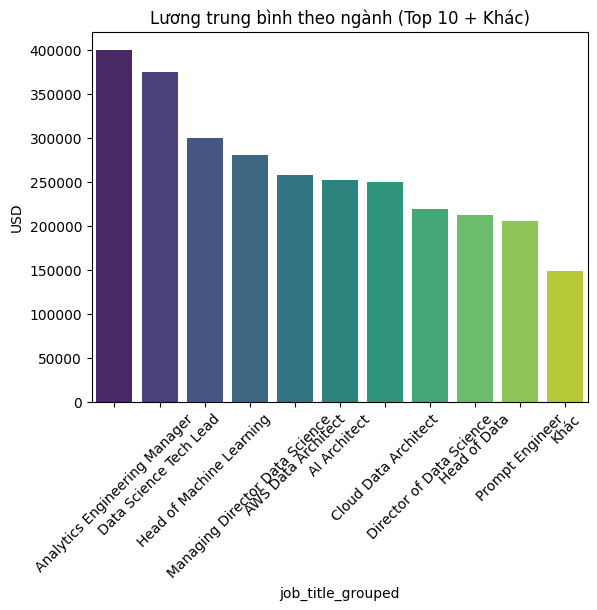

In [7]:
# Phân tích mô tả
# Xác định top 10 ngành có lương trung bình cao nhất
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10).index

# Tạo cột mới: nếu không thuộc top 10 thì gán là 'Khác'
df['job_title_grouped'] = df['job_title'].apply(lambda x: x if x in top_jobs else 'Khác')

# Tính lương trung bình theo nhóm ngành (bao gồm 'Khác')
salary_by_group = df.groupby('job_title_grouped')['salary_in_usd'].mean().sort_values(ascending=False)

sns.barplot(
    x=salary_by_group.index,
    y=salary_by_group.values,
    palette='viridis'
)
plt.title('Lương trung bình theo ngành (Top 10 + Khác)')
plt.ylabel('USD')
plt.xticks(rotation=45)
plt.show()
# ...existing code...

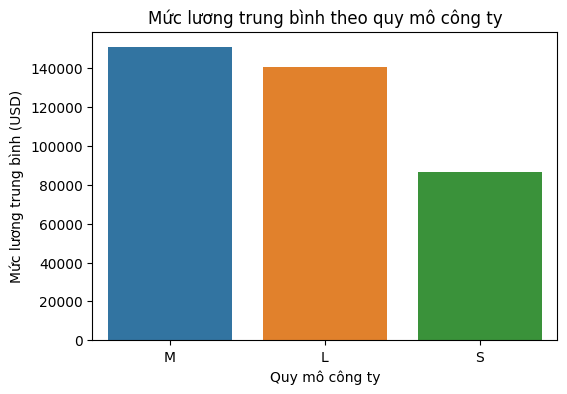

In [10]:
# Biểu đồ 2

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='company_size', y='salary_in_usd',hue='company_size', estimator='mean', errorbar=None)
plt.title('Mức lương trung bình theo quy mô công ty')
plt.xlabel('Quy mô công ty')
plt.ylabel('Mức lương trung bình (USD)')
plt.show()


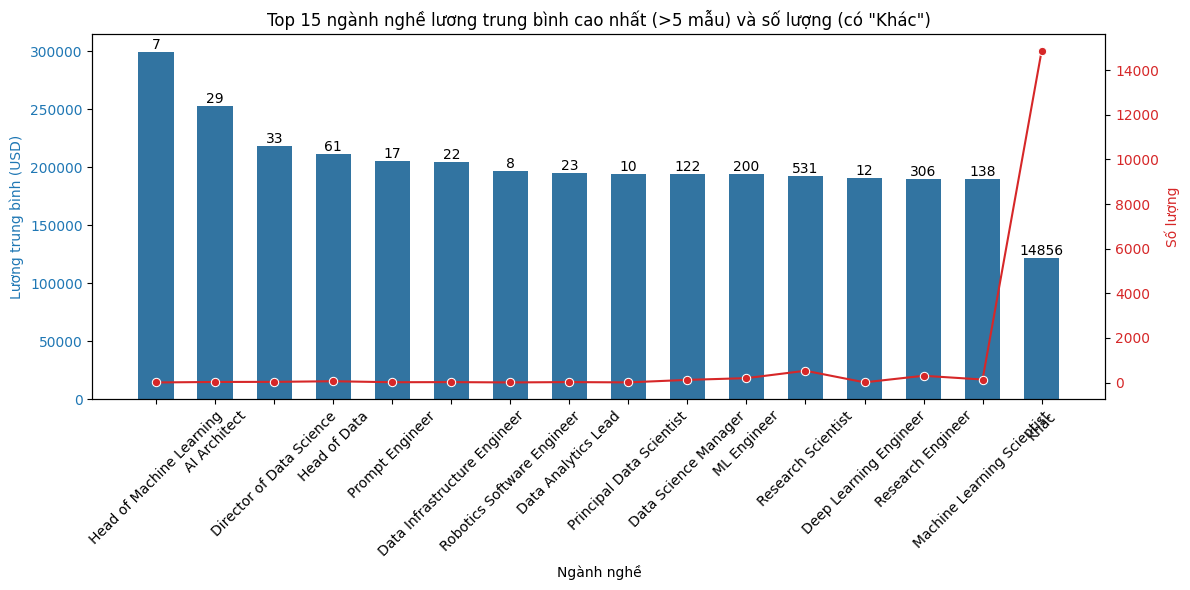

In [11]:
# ...existing code...

# Tính lương trung bình và số lượng theo ngành nghề
job_stats = df.groupby('job_title').agg(
    salary_mean=('salary_in_usd', 'mean'),
    count=('salary_in_usd', 'size')
)

# Chỉ lấy các ngành có trên 5 mẫu
job_stats_filtered = job_stats[job_stats['count'] > 5].sort_values('salary_mean', ascending=False)

# Lấy top 15 ngành có lương trung bình cao nhất
top15 = job_stats_filtered.head(15)

# Tính trung bình và tổng số lượng các ngành còn lại
other = job_stats_filtered.iloc[15:]
other_row = pd.DataFrame({
    'salary_mean': [other['salary_mean'].mean()],
    'count': [other['count'].sum()]
}, index=['Khác'])

# Gộp lại
plot_data = pd.concat([top15, other_row])

# Vẽ biểu đồ với số lượng trên đầu cột
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Ngành nghề')
ax1.set_ylabel('Lương trung bình (USD)', color=color)
bars = sns.barplot(x=plot_data.index, y='salary_mean', data=plot_data, ax=ax1, color=color,width=0.6)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45)

for i, (count, bar) in enumerate(zip(plot_data['count'], bars.patches)):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(count)}',
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Vẽ số lượng trên trục Y phụ
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Số lượng', color=color)
sns.lineplot(x=plot_data.index, y='count', data=plot_data, ax=ax2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top 15 ngành nghề lương trung bình cao nhất (>5 mẫu) và số lượng (có "Khác")')
plt.tight_layout()
plt.show()
# ...existing code...

C:\Users\TUAN\AppData\Local\Temp\ipykernel_3540\1277558251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


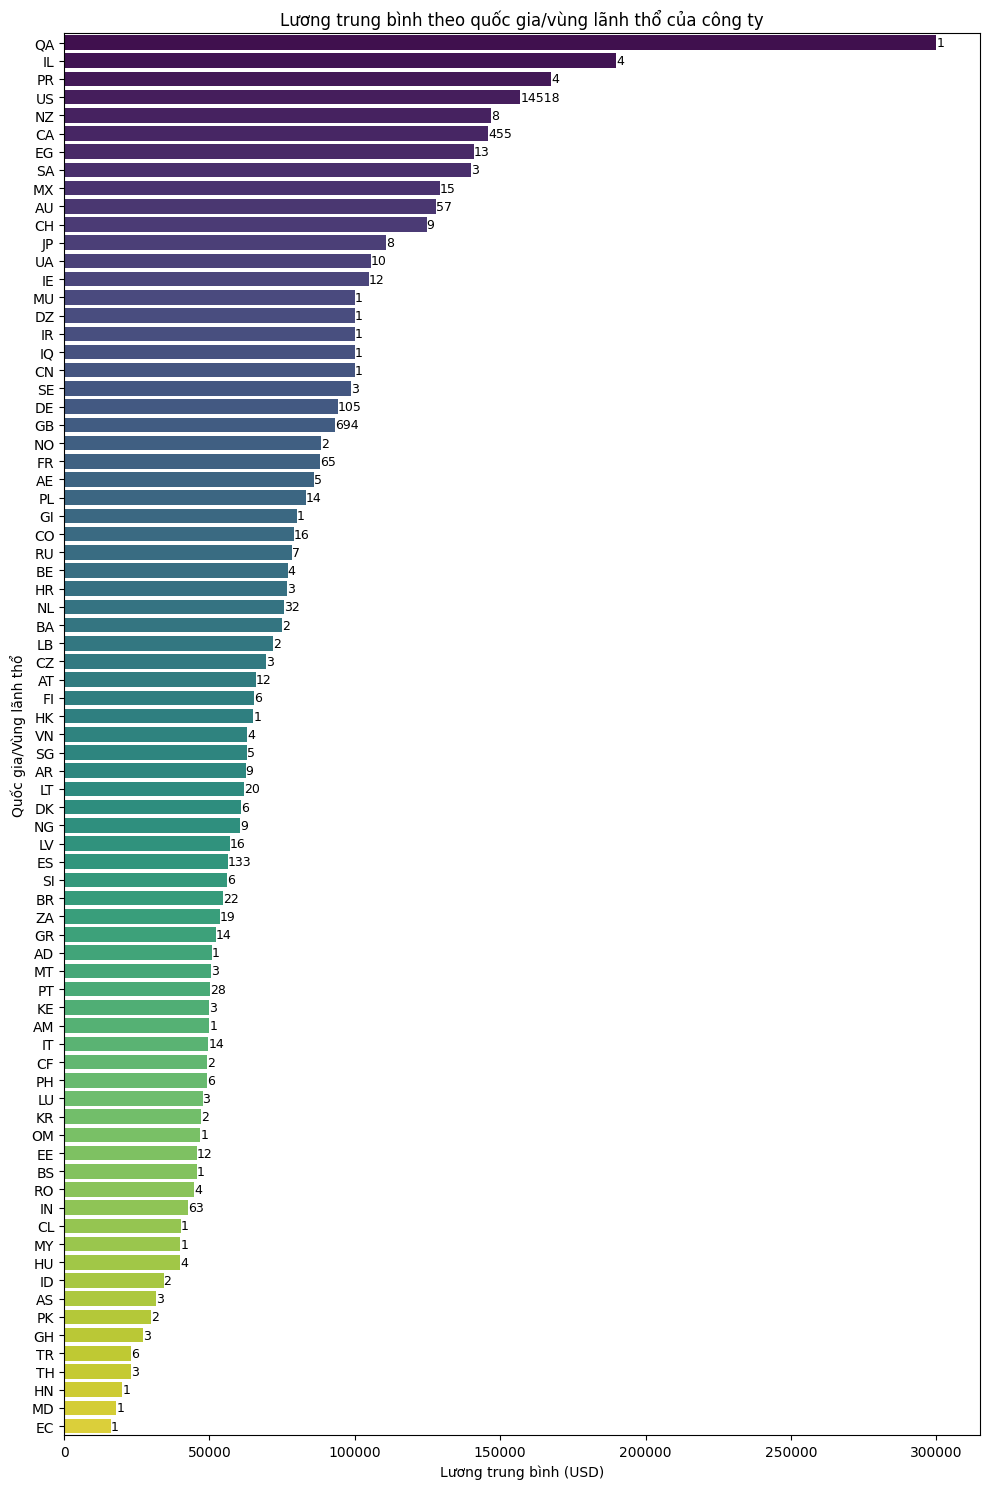

In [13]:

# Tính lương trung bình và số lượng mẫu theo quốc gia/vùng lãnh thổ của công ty
location_stats = df.groupby('company_location').agg(
    salary_mean=('salary_in_usd', 'mean'),
    count=('salary_in_usd', 'size')
).sort_values('salary_mean', ascending=False)

plt.figure(figsize=(10, 15))
bars = sns.barplot(
    y=location_stats.index,
    x=location_stats['salary_mean'],
    palette='viridis'
)
plt.title('Lương trung bình theo quốc gia/vùng lãnh thổ của công ty')
plt.ylabel('Quốc gia/Vùng lãnh thổ')
plt.xlabel('Lương trung bình (USD)')

# Ghi số lượng mẫu lên đầu mỗi cột
for bar, count in zip(bars.patches, location_stats['count']):
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{int(count)}',
        va='center', ha='left', fontsize=9, color='black'
    )

plt.tight_layout()
plt.show()
#

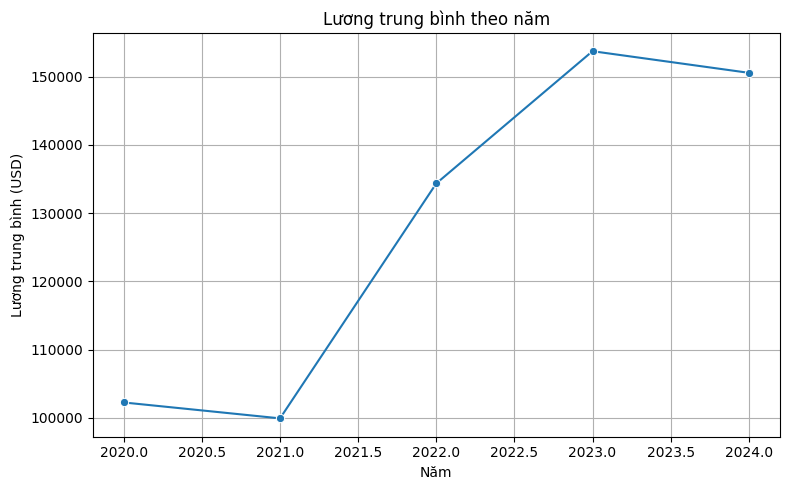

In [14]:

# Vẽ line chart lương trung bình theo năm
salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=salary_by_year.index, y=salary_by_year.values, marker='o')
plt.title('Lương trung bình theo năm')
plt.xlabel('Năm')
plt.ylabel('Lương trung bình (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\TUAN\AppData\Local\Temp\ipykernel_3540\4045940396.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_top10.index, y=salary_by_top10.values, palette='viridis')


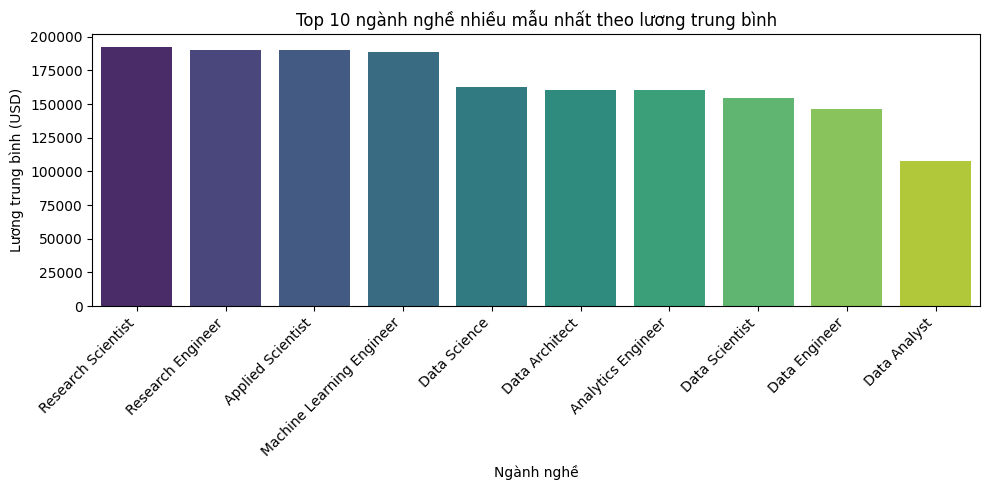

In [15]:

# Lấy top 10 ngành nghề có số lượng mẫu nhiều nhất
top10_jobs = df['job_title'].value_counts().head(10).index

# Tính lương trung bình cho các ngành này
salary_by_top10 = df[df['job_title'].isin(top10_jobs)].groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=salary_by_top10.index, y=salary_by_top10.values, palette='viridis')
plt.title('Top 10 ngành nghề nhiều mẫu nhất theo lương trung bình')
plt.xlabel('Ngành nghề')
plt.ylabel('Lương trung bình (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

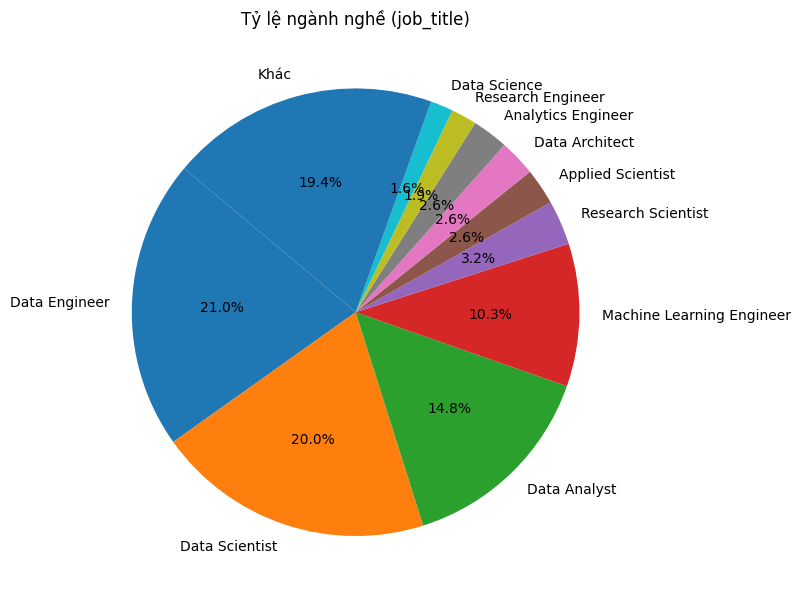

In [16]:

# Đếm số lượng từng ngành nghề
job_counts = df['job_title'].value_counts()

# Nếu ngành nghề quá nhiều, chỉ lấy top 10, còn lại gộp vào 'Khác'
top_n = 10
job_counts_top = job_counts.head(top_n)
other_count = job_counts[top_n:].sum()
job_counts_top['Khác'] = other_count

# Vẽ pie chart
plt.figure(figsize=(8, 8))
plt.pie(job_counts_top, labels=job_counts_top.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ ngành nghề (job_title)')
plt.tight_layout()
plt.show()

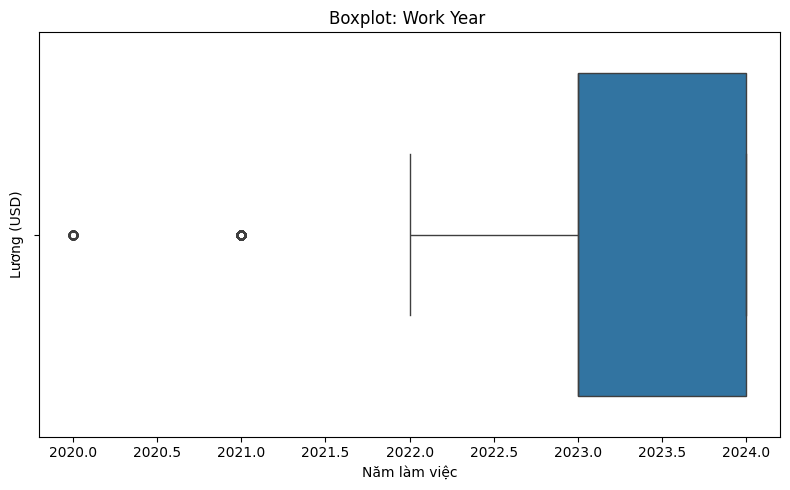

In [17]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='work_year', data=df)
plt.title('Boxplot: Work Year ')
plt.xlabel('Năm làm việc')
plt.ylabel('Lương (USD)')
plt.tight_layout()
plt.show()


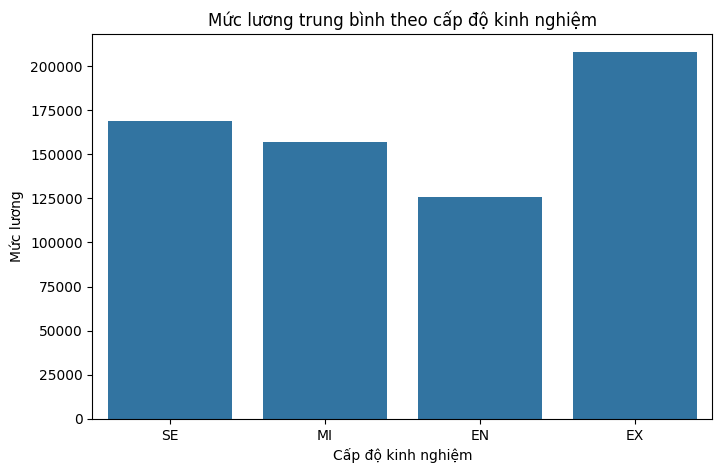

In [12]:
# Giả sử bạn có DataFrame df
# df = pd.read_csv(...) # có cột 'experience_level' và 'salary_in_usd'

# Tạo biểu đồ
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='experience_level', y='salary', estimator='mean', errorbar=None)

plt.title('Mức lương trung bình theo cấp độ kinh nghiệm')
plt.xlabel('Cấp độ kinh nghiệm')
plt.ylabel('Mức lương')
plt.show()


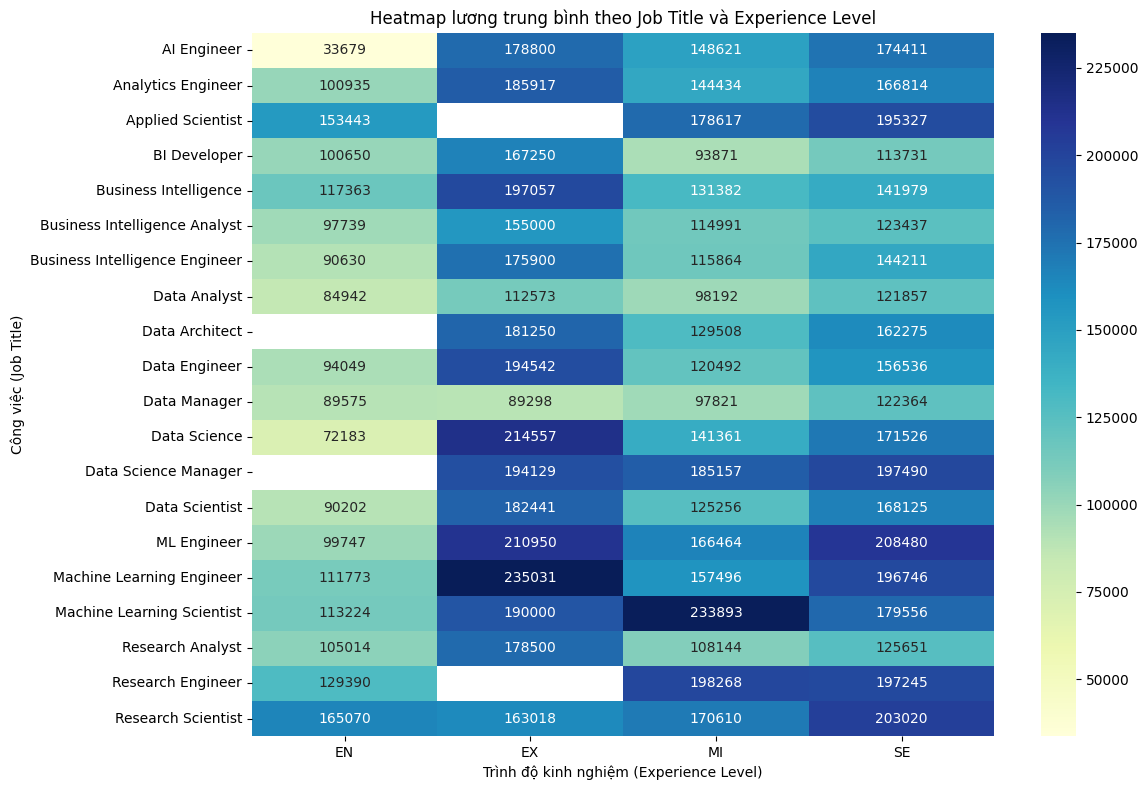

In [18]:

# Lấy top 20 job_title có nhiều mẫu nhất
top20_jobs = df['job_title'].value_counts().head(20).index

# Lọc dữ liệu chỉ lấy các job_title này
df_top20 = df[df['job_title'].isin(top20_jobs)]

# Tạo bảng pivot: lương trung bình theo job_title và experience_level
pivot = df_top20.pivot_table(
    index='job_title',
    columns='experience_level',
    values='salary_in_usd',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap lương trung bình theo Job Title và Experience Level')
plt.xlabel('Trình độ kinh nghiệm (Experience Level)')
plt.ylabel('Công việc (Job Title)')
plt.tight_layout()
plt.show()


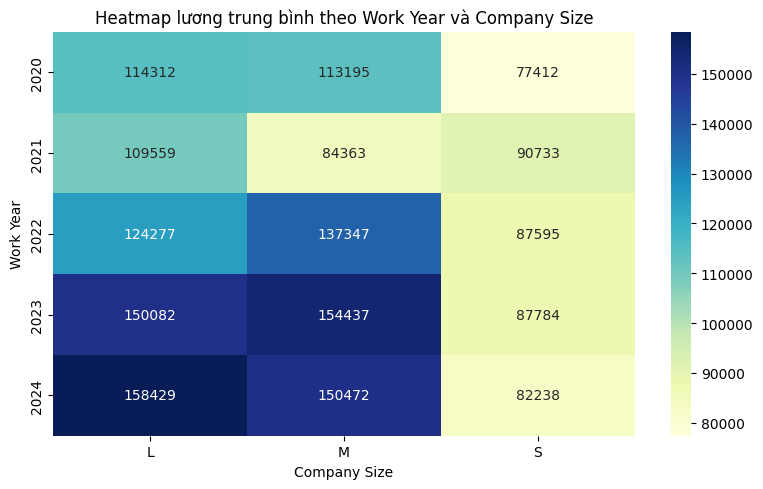

In [19]:

# Tạo bảng pivot: lương trung bình theo work_year và company_size
pivot = df.pivot_table(
    index='work_year',
    columns='company_size',
    values='salary_in_usd',
    aggfunc='mean'
)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap lương trung bình theo Work Year và Company Size')
plt.xlabel('Company Size')
plt.ylabel('Work Year')
plt.tight_layout()
plt.show()


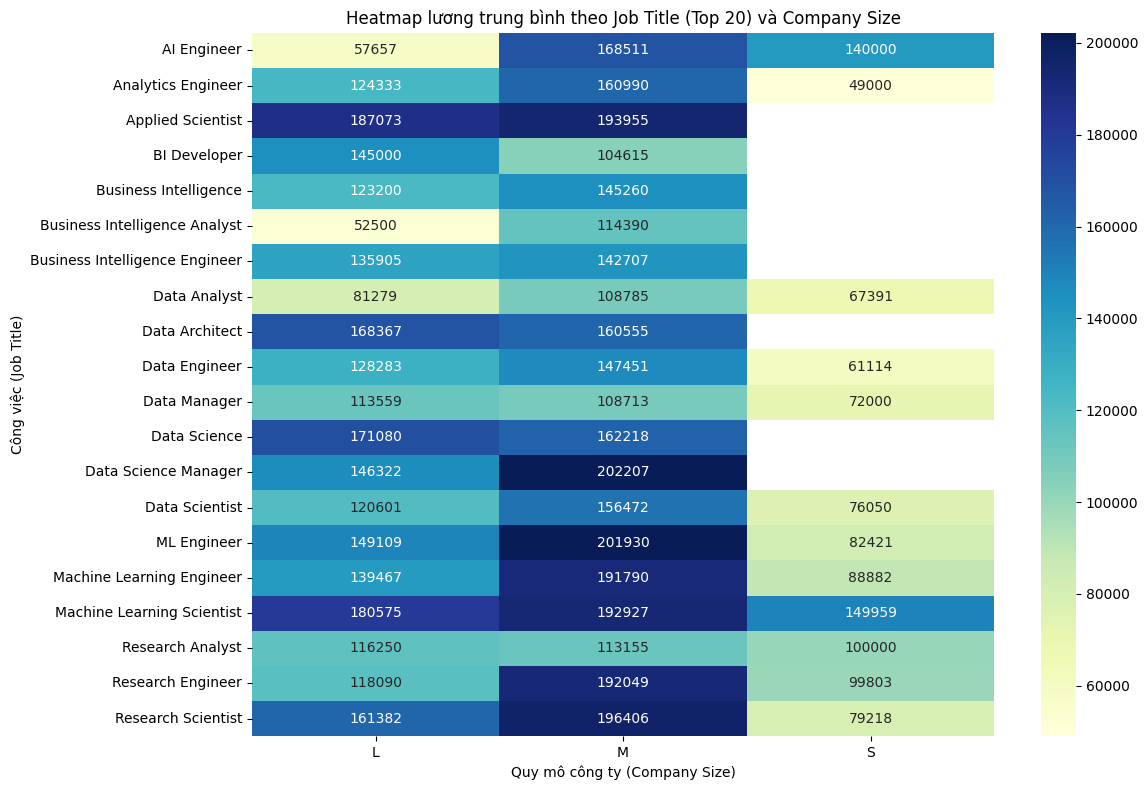

In [20]:

# Lấy top 20 job_title có nhiều mẫu nhất
top20_jobs = df['job_title'].value_counts().head(20).index

# Lọc dữ liệu chỉ lấy các job_title này
df_top20 = df[df['job_title'].isin(top20_jobs)]

# Tạo bảng pivot: lương trung bình theo job_title và company_size
pivot = df_top20.pivot_table(
    index='job_title',
    columns='company_size',
    values='salary_in_usd',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap lương trung bình theo Job Title (Top 20) và Company Size')
plt.xlabel('Quy mô công ty (Company Size)')
plt.ylabel('Công việc (Job Title)')
plt.tight_layout()
plt.show()


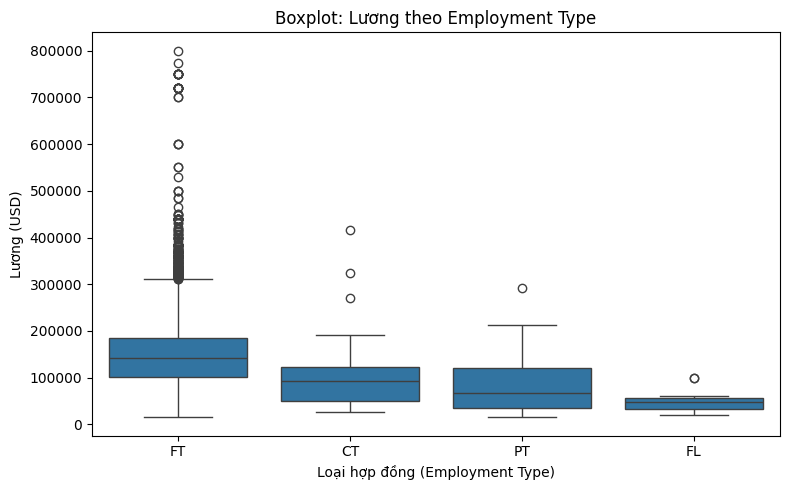

In [21]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd')
plt.title('Boxplot: Lương theo Employment Type')
plt.xlabel('Loại hợp đồng (Employment Type)')
plt.ylabel('Lương (USD)')
plt.tight_layout()
plt.show()


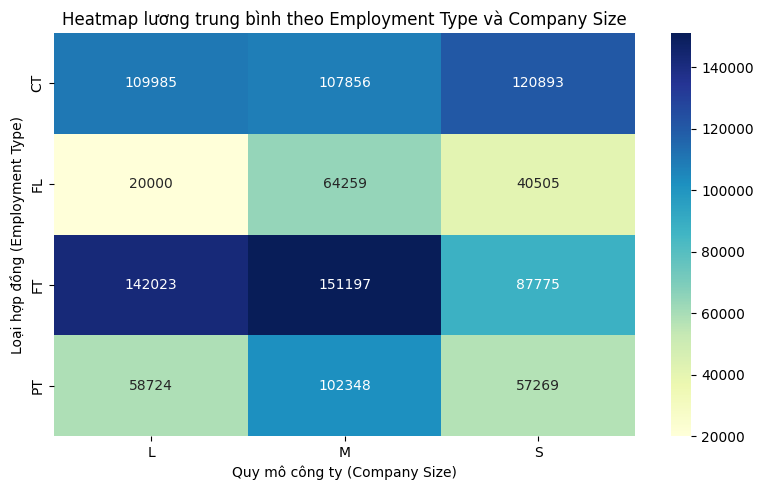

In [22]:

# Tạo bảng pivot: lương trung bình theo employment_type và company_size
pivot = df.pivot_table(
    index='employment_type',
    columns='company_size',
    values='salary_in_usd',
    aggfunc='mean'
)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap lương trung bình theo Employment Type và Company Size')
plt.xlabel('Quy mô công ty (Company Size)')
plt.ylabel('Loại hợp đồng (Employment Type)')
plt.tight_layout()
plt.show()

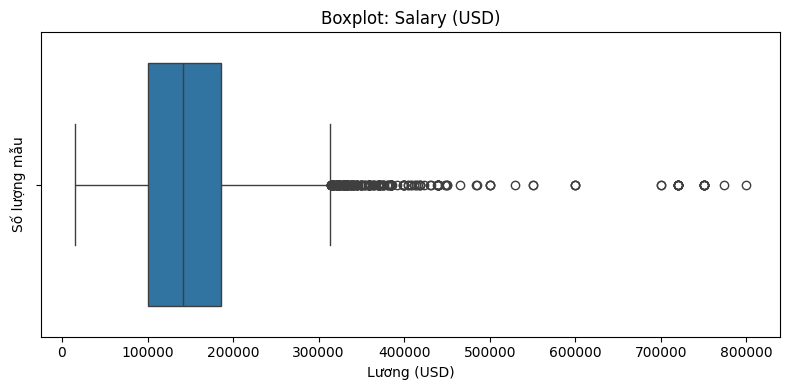

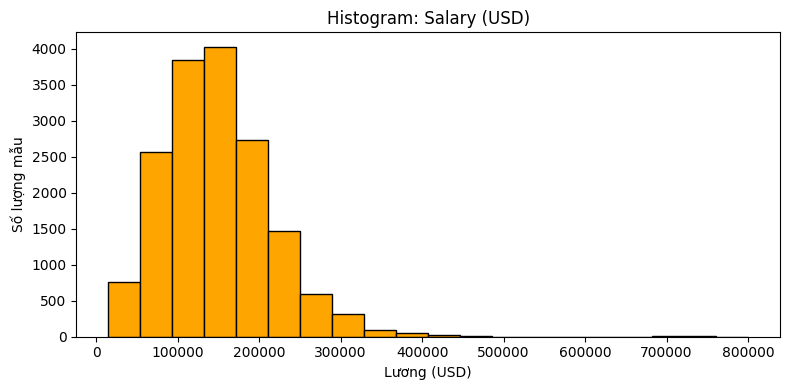

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Boxplot: Salary (USD)')
plt.xlabel('Lương (USD)')
plt.ylabel('Số lượng mẫu')
plt.tight_layout()
plt.show()

# Histogram cho salary
plt.figure(figsize=(8, 4))
plt.hist(df['salary_in_usd'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram: Salary (USD)')
plt.xlabel('Lương (USD)')
plt.ylabel('Số lượng mẫu')
plt.tight_layout()
plt.show()

RMSE: 51365.33
R2 Score: 0.3692


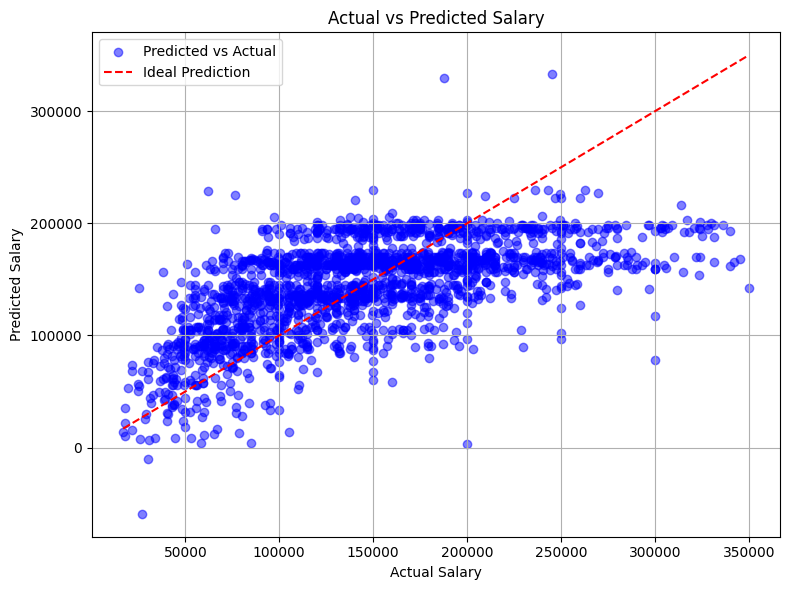

Model, encoder và scaler đã được lưu.


In [8]:
# Xây dựng mô hình hồi quy tuyến tính
train_and_save_model(X, y, encoder, scaler)

RMSE: 52772.80
R2 Score: 0.3341


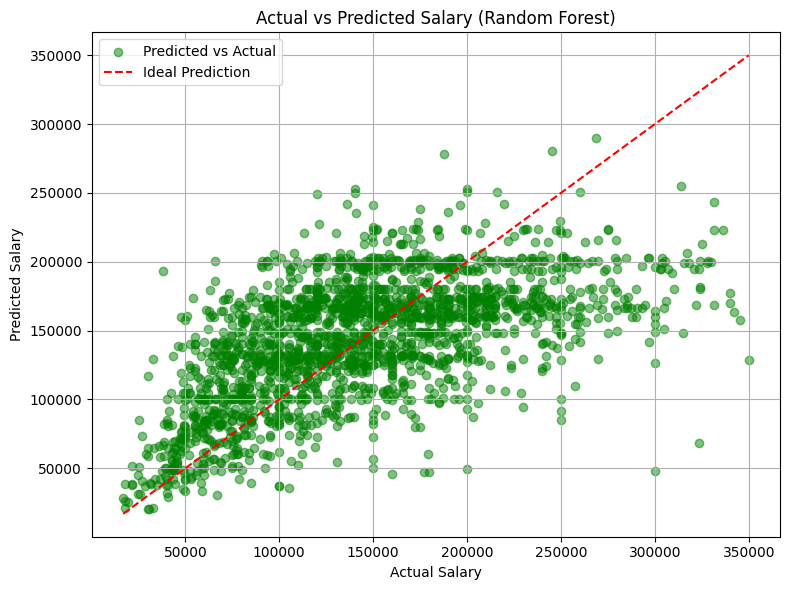

Model and encoder saved successfully.


In [9]:
train_and_save_model_improve(X, y, encoder)